In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

645

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d389236a87663a38acb37053be4f7ffd


In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mangan
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | kamenka
Processing Record 4 of Set 1 | severo-kurilsk
Processing Record 5 of Set 1 | cayenne
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | los llanos de aridane
Processing Record 8 of Set 1 | tuatapere
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | bogorodskoye
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | sioux lookout
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | tselinnoye
Processing Record 17 of Set 1 | airai
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | chifeng
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | hithadhoo
Processi

City not found. Skipping...
Processing Record 41 of Set 4 | flagstaff
Processing Record 42 of Set 4 | bogande
Processing Record 43 of Set 4 | shaunavon
Processing Record 44 of Set 4 | evanston
Processing Record 45 of Set 4 | slupca
Processing Record 46 of Set 4 | mar del plata
Processing Record 47 of Set 4 | ilulissat
Processing Record 48 of Set 4 | castro
Processing Record 49 of Set 4 | bambous virieux
Processing Record 50 of Set 4 | uchiza
Processing Record 1 of Set 5 | kamaishi
Processing Record 2 of Set 5 | buraydah
Processing Record 3 of Set 5 | comodoro rivadavia
Processing Record 4 of Set 5 | genova
Processing Record 5 of Set 5 | hovd
Processing Record 6 of Set 5 | dongsheng
Processing Record 7 of Set 5 | montepuez
Processing Record 8 of Set 5 | olinda
Processing Record 9 of Set 5 | council bluffs
Processing Record 10 of Set 5 | namibe
Processing Record 11 of Set 5 | bajo baudo
City not found. Skipping...
Processing Record 12 of Set 5 | caceres
Processing Record 13 of Set 5 | ul

Processing Record 30 of Set 8 | menomonie
Processing Record 31 of Set 8 | bayan
Processing Record 32 of Set 8 | marzuq
Processing Record 33 of Set 8 | burnie
Processing Record 34 of Set 8 | antalya
Processing Record 35 of Set 8 | dhidhdhoo
Processing Record 36 of Set 8 | galesong
Processing Record 37 of Set 8 | baijiantan
Processing Record 38 of Set 8 | tautira
Processing Record 39 of Set 8 | angoram
Processing Record 40 of Set 8 | wanaka
Processing Record 41 of Set 8 | botou
Processing Record 42 of Set 8 | havoysund
Processing Record 43 of Set 8 | turan
Processing Record 44 of Set 8 | rungata
City not found. Skipping...
Processing Record 45 of Set 8 | axim
Processing Record 46 of Set 8 | adre
Processing Record 47 of Set 8 | vila velha
Processing Record 48 of Set 8 | luanda
Processing Record 49 of Set 8 | seka
Processing Record 50 of Set 8 | nanortalik
Processing Record 1 of Set 9 | sisimiut
Processing Record 2 of Set 9 | slavyanka
Processing Record 3 of Set 9 | hervey bay
Processing R

Processing Record 15 of Set 12 | yamethin
Processing Record 16 of Set 12 | kiama
Processing Record 17 of Set 12 | olafsvik
Processing Record 18 of Set 12 | nantucket
Processing Record 19 of Set 12 | banepa
Processing Record 20 of Set 12 | qaqortoq
Processing Record 21 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 22 of Set 12 | tambopata
Processing Record 23 of Set 12 | carutapera
Processing Record 24 of Set 12 | halalo
City not found. Skipping...
Processing Record 25 of Set 12 | chaihe
Processing Record 26 of Set 12 | kununurra
Processing Record 27 of Set 12 | kolokani
Processing Record 28 of Set 12 | mayo
Processing Record 29 of Set 12 | machinga
Processing Record 30 of Set 12 | behshahr
Processing Record 31 of Set 12 | san policarpo
Processing Record 32 of Set 12 | san francisco
Processing Record 33 of Set 12 | alberdi
Processing Record 34 of Set 12 | panjwin
City not found. Skipping...
Processing Record 35 of Set 12 | erenhot
Processing Record 36 of Set 12 |

In [14]:
len(city_data)

591

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mangan,27.5167,88.5333,51.57,97,100,1.03,IN,2021-12-29 01:57:20
1,Busselton,-33.6500,115.3333,93.04,32,0,6.58,AU,2021-12-29 01:57:21
2,Kamenka,51.3223,42.7678,9.75,90,100,12.71,RU,2021-12-29 01:57:21
3,Severo-Kurilsk,50.6789,156.1250,29.19,84,100,28.61,RU,2021-12-29 01:53:58
4,Cayenne,4.9333,-52.3333,75.24,92,75,2.30,GF,2021-12-29 01:57:22
5,Ushuaia,-54.8000,-68.3000,53.26,50,40,13.80,AR,2021-12-29 01:57:22
6,Los Llanos De Aridane,28.6585,-17.9182,60.55,77,75,6.91,ES,2021-12-29 01:57:22
7,Tuatapere,-46.1333,167.6833,59.83,65,91,10.11,NZ,2021-12-29 01:57:23
8,Yellowknife,62.4560,-114.3525,-32.71,78,20,4.61,CA,2021-12-29 01:54:29
9,Bogorodskoye,56.5500,37.8833,3.09,99,100,5.50,RU,2021-12-29 01:57:23


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mangan,IN,2021-12-29 01:57:20,27.5167,88.5333,51.57,97,100,1.03
1,Busselton,AU,2021-12-29 01:57:21,-33.6500,115.3333,93.04,32,0,6.58
2,Kamenka,RU,2021-12-29 01:57:21,51.3223,42.7678,9.75,90,100,12.71
3,Severo-Kurilsk,RU,2021-12-29 01:53:58,50.6789,156.1250,29.19,84,100,28.61
4,Cayenne,GF,2021-12-29 01:57:22,4.9333,-52.3333,75.24,92,75,2.30
...,...,...,...,...,...,...,...,...,...
586,Breytovo,RU,2021-12-29 02:14:00,58.2993,37.8617,5.38,99,100,5.66
587,Curuguaty,PY,2021-12-29 02:14:01,-24.4694,-55.6945,77.02,30,80,3.36
588,Tabatinga,BR,2021-12-29 02:14:01,-4.2525,-69.9381,78.89,100,40,2.30
589,Darhan,MN,2021-12-29 02:14:02,49.4867,105.9228,2.79,86,100,4.79


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

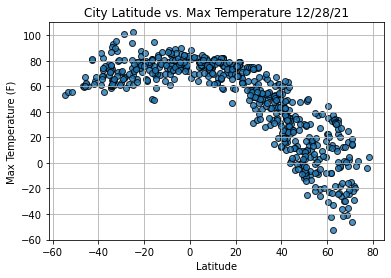

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

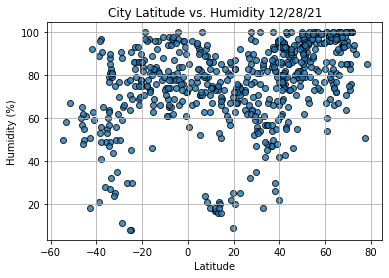

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

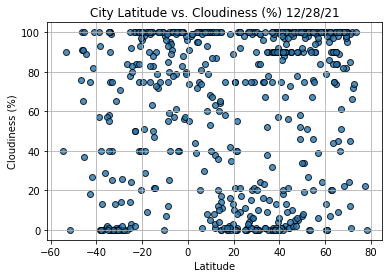

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

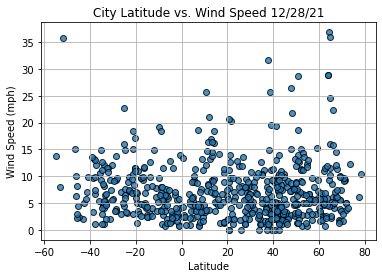

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

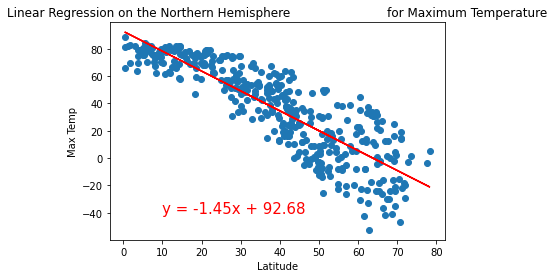

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-40))

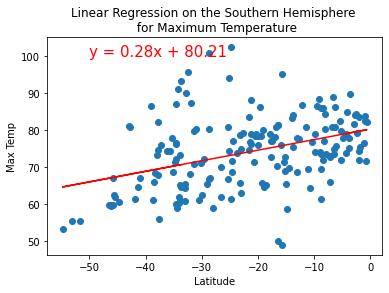

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,100))

C:\Users\eburn\anaconda3\envs\PythonData\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


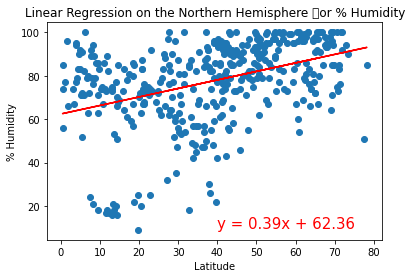

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \for % Humidity', '% Humidity',(40,10))

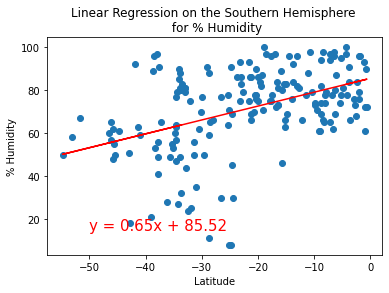

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

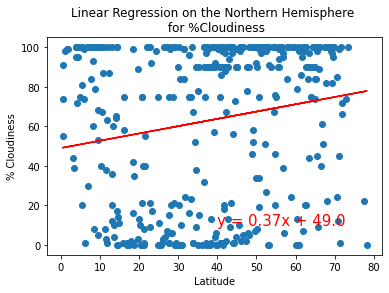

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for %Cloudiness', '% Cloudiness',(40,10))

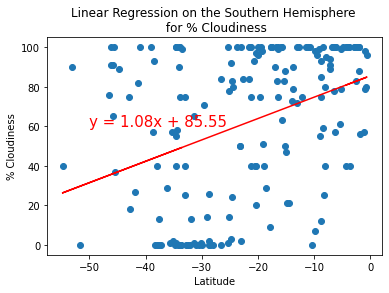

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

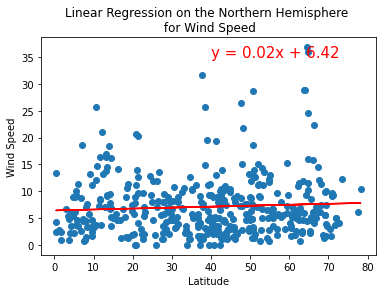

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

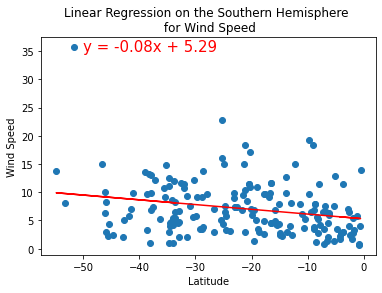

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))